In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from collections import Counter

In [12]:
# Load the dataset
df = pd.read_csv("../data/chat_datasets/emotionlines.csv")
print("✅ Data Loaded")
display(df.head())
print(df.columns)

✅ Data Loaded


,dialog,act,emotion
0,"['Say , Jim , how about going for a few beers ...","[3, 4, 2, 2, 2, 3, 4, 1, 3, 4]","[0, 0, 0, 0, 0, 0, 4, 4, 4, 4]"
1,"['Can you do push-ups ? ', "" Of course I can ....","[2, 1, 2, 2, 1, 1]","[0, 0, 6, 0, 0, 0]"
2,"['Can you study with the radio on ? ', ' No , ...","[2, 1, 2, 1, 1]","[0, 0, 0, 0, 0]"
3,"['Are you all right ? ', ' I will be all right...","[2, 1, 1, 1]","[0, 0, 0, 0]"
4,"['Hey John , nice skates . Are they new ? ', '...","[2, 1, 2, 1, 1, 2, 1, 3, 4]","[0, 0, 0, 0, 0, 6, 0, 6, 0]"


Index(['dialog', 'act', 'emotion'], dtype='object')


In [13]:
# Dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11118 entries, 0 to 11117
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   dialog   11118 non-null  object
 1   act      11118 non-null  object
 2   emotion  11118 non-null  object
dtypes: object(3)
memory usage: 260.7+ KB


In [14]:
# Check for missing values
print("\nMissing values:\n", df.isnull().sum())


Missing values:
 dialog     0
act        0
emotion    0
dtype: int64


In [15]:
# Convert emotion column (stringified lists) into Python lists
emotion_lists = df["emotion"].dropna().apply(ast.literal_eval)

In [16]:

# Flatten all emotion tags into one list
flat_emotions = [label for sublist in emotion_lists for label in sublist]

In [17]:
# Count how many of each label
emotion_counts = Counter(flat_emotions)

In [18]:
# Map index to readable label
emotion_labels = {
    0: "no emotion",
    1: "anger",
    2: "disgust",
    3: "fear",
    4: "happiness",
    5: "sadness",
    6: "surprise"
}

In [19]:
# Create a mapped count dictionary
mapped_counts = {emotion_labels[k]: v for k, v in emotion_counts.items()}


C:\Users\DELL\AppData\Local\Temp\ipykernel_10292\1672992751.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(mapped_counts.keys()), y=list(mapped_counts.values()), palette="pastel")


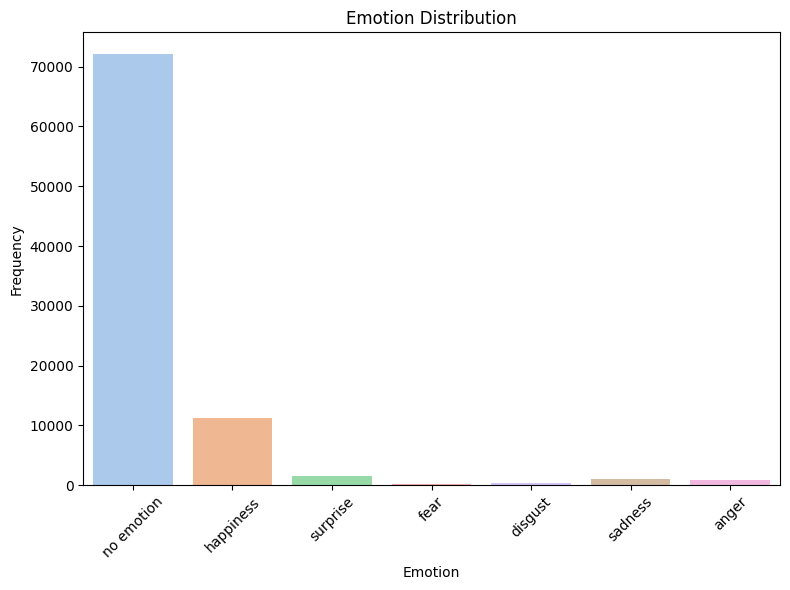

In [20]:
# Plot the bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=list(mapped_counts.keys()), y=list(mapped_counts.values()), palette="pastel")
plt.title("Emotion Distribution")
plt.xlabel("Emotion")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()